In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


class LinearRegression():

    def __init__(self, learning_rate: float, iterations: int):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = np.zeros(0)
        self.b = 0
        self.n = 0
        self.m = 0

        self.loss = []

    def fit(self, X: np.ndarray, Y: np.ndarray):
        self.n = Y.shape[0]
        self.m = X.shape[1] # число прищнаков
        self.w = np.ones((self.m, 1))
        for i in range(self.iterations):
            self.update_weights(X, Y)

    def update_weights(self, X: np.ndarray, Y: np.ndarray):
        Y_pr = self.predict(X)
        err = Y_pr - Y
        djdb = np.mean(err)
        djdw = np.mean(X * err.reshape((self.n, 1)), axis=0).reshape(self.w.shape)
        self.b -= self.learning_rate * djdb
        self.w -= self.learning_rate * djdw

        self.loss.append(np.mean(err ** 2))

    def predict(self, X: np.ndarray) -> np.ndarray:
        res = X @ self.w + self.b
        return res.reshape((X.shape[0]))

(20, 1) (10, 1) (20,) (10,)


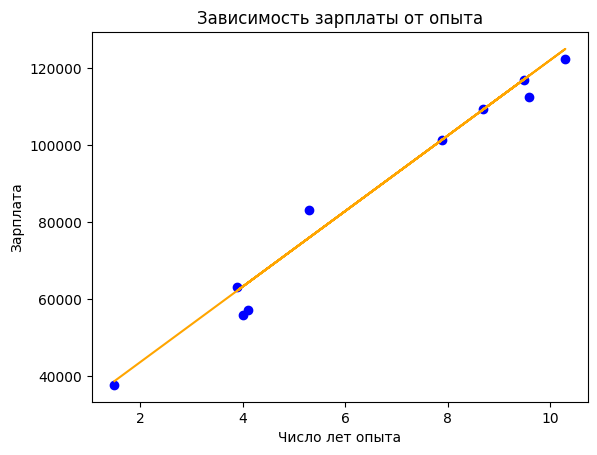

In [4]:

df = pd.read_csv( "a05_salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'orange')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')

plt.show()